In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import csv

In [15]:
building_violatoins = pd.read_csv("./data/Building-Property-Violations.csv")
building_violatoins.head()

,case_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,violation_suffix,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V640594,2022-10-25 14:33:50,Open,105.1,NaN,Failure to Obtain Permit,266,NaN,Princeton,ST,...,01,266 PRINCETON ST,NaN,EAST BOSTON,MA,02128,113277,42.379920,-71.03004,"(42.379920000459, -71.03004000120775)"
1,V640442,2022-10-25 09:10:17,Open,102.8,NaN,Maintenance,98,NaN,Mount Vernon,ST,...,05,98 Mount Vernon St,NaN,Boston,MA,02108,98802,42.357810,-71.06906,"(42.35781000017358, -71.0690600012453)"
2,V640293,2022-10-24 15:41:12,Open,102.8,NaN,Maintenance,96,NaN,Mount Vernon,ST,...,05,96 MOUNT VERNON ST,NaN,BOSTON,MA,02108,98779,42.357810,-71.06896,"(42.35781000018984, -71.0689600011537)"
3,V640286,2022-10-24 15:15:50,Open,105.1,NaN,Failure to Obtain Permit,85,NaN,Como,RD,...,18,85 COMO RD,NaN,HYDE PARK,MA,02136,41543,42.241330,-71.14157,"(42.241329999816, -71.1415700008891)"
4,V640272,2022-10-24 14:47:59,Open,907.8,NaN,Fire Protection Systems,27,NaN,Nay,ST,...,01,94 CONDOR ST,NaN,BOSTON,MA,02128,167991,42.383065,-71.03797,"(42.38306451209138, -71.03797006220091)"


In [16]:
public_works = pd.read_csv("./data/Public-Works-Violations.csv")
public_works.head()

C:\Users\david\AppData\Local\Temp\ipykernel_21472\2907154567.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  public_works = pd.read_csv("./data/Public-Works-Violations.csv")


,case_no,ticket_no,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,CE641266,M4ZFMN18,2022-10-28 07:10:00,Open,3,100,Overfilling of barrel/dumpster,66,76,Brighton,...,21,C/O MARCEL SANDER,98 LANCASTER TER,BROOKLINE,MA,02446,20171,42.352400,-71.128810,"(42.352399999883836, -71.12881000090667)"
1,CE641265,5B07HK13,2022-10-28 07:03:00,Open,1,25,Improper storage trash: res,6,NaN,Fisher,...,10,6 FISHER AV,C/O JIAN RU ZHU,ROXBURY,MA,02120,58586,42.327020,-71.100070,"(42.32701999996131, -71.10007000161619)"
2,CE641264,KYQXAV18,2022-10-28 07:03:00,Open,3,100,Overfilling of barrel/dumpster,1165,1177,Commonwealth,...,21,1165 COMMONWEALTH AVE,NaN,ALLSTON,MA,02134,37065,42.350837,-71.128527,"(42.350837200374166, -71.12852661065048)"
3,CE641263,YS11Z218,2022-10-28 06:58:00,Open,3,100,Overfilling of barrel/dumpster,31,NaN,Saint Lukes,...,21,BOX 298,NaN,BROOKLINE,MA,02146,121297,42.351124,-71.127441,"(42.35112395576323, -71.12744053245933)"
4,CE641262,ZAXSM613,2022-10-28 06:56:00,Open,1,25,Improper storage trash: res,216,,Calumet,...,10,146 PLEASANT ST,NaN,LEXINGTON,MA,02421,343868,42.328713,-71.100428,"(42.32871281185851, -71.10042770678677)"


<AxesSubplot: title={'center': 'Violation Count Per Violation Type'}, xlabel='Violaton Type', ylabel='Violation Count'>

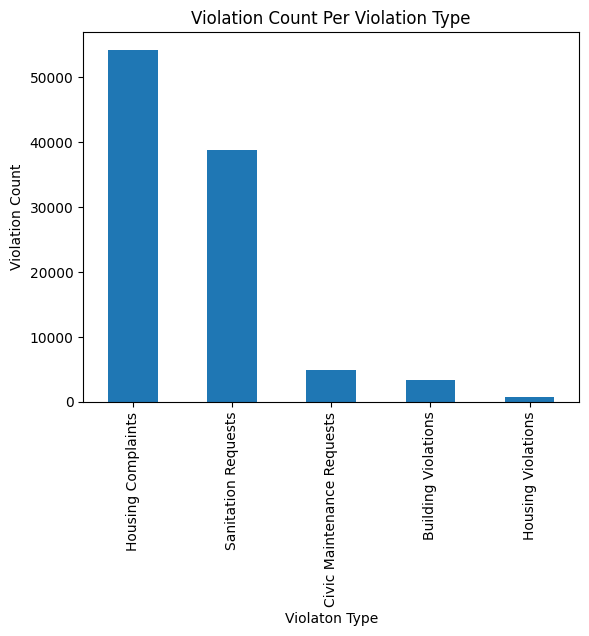

In [17]:
rent_smart = pd.read_csv("./data/RentSmart-Data.csv")
#rent_smart['neighborhood'].unique()


rent_smart = rent_smart[['date', 'violation_type', 'address', 'latitude', 'longitude']]
rent_smart = rent_smart[rent_smart['violation_type'] != 'Enforcement Violations']
#rent_smart[['latitude','longitude']].round(5)
#rent_smart.sort_values(by='latitude', ascending=False).head(10)
rent_smart['violation_type'].value_counts().plot.bar(xlabel="Violaton Type", ylabel="Violation Count", title="Violation Count Per Violation Type")

In [3]:
padlong = pd.read_csv("./data/PAD.Long.2021.csv")

l = ["R1", "R2", "R3", "R4"]
padlong = padlong[padlong['FY2021.AV'].notna()]
padlong = padlong[padlong['FY2021.LU'].isin(l)]

padlong.drop(
    padlong.columns.difference(
        ['PID', 'CM_ID', 'ST_NAME', 'ST_NUM', 'ZIPCODE', 'FY2021.LU', 'FY2021.AV', 'DiffAV2021', 'X', 'Y', 'Blk_ID_10' ]
        ), 1, inplace=True)
padlong.rename(columns={'X': 'longitude', 'Y': 'latitude'}, inplace=True)
padlong["Address"] = padlong['ST_NUM'] + ' ' + padlong['ST_NAME']
#padlong[['X', 'Y']] = padlong[['X', 'Y']].round(5)
padlong['price_bracket'] = padlong['FY2021.AV'].apply(
    lambda x: '$1000000+' if len(str(x)) >= 9
    else '$'+str(int(round(x,-5))) + '-' + str(int(round(x,-5) + 100000)) if round(x,-5) < (round(x,-4))
    else '$'+str(int(round(x,-5) - 100000)) + '-' + str(int(round(x,-5))) if round(x,-5) > (round(x,-4)) 
    else None)



C:\Users\david\AppData\Local\Temp\ipykernel_16764\15320638.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  padlong.drop(


In [4]:
padlong.head()

,PID,CM_ID,ST_NUM,ST_NAME,ZIPCODE,FY2021.LU,FY2021.AV,DiffAV2021,longitude,latitude,Blk_ID_10,Address,price_bracket
30,100001000,100153000.0,104 A 104,PUTNAM ST,2128.0,R3,719400.0,113900.0,-71.032588,42.379394,2.502505e+14,104 A 104 PUTNAM ST,$700000-800000
41,1000018000,NaN,1,WORTHINGTON ST,2120.0,R1,835700.0,102200.0,-71.102243,42.333737,2.502508e+14,1 WORTHINGTON ST,$800000-900000
42,1000019000,NaN,3,WORTHINGTON ST,2120.0,R1,854300.0,40300.0,-71.102211,42.333788,2.502508e+14,3 WORTHINGTON ST,$800000-900000
43,100002000,100153000.0,197,LEXINGTON ST,2128.0,R3,744800.0,77100.0,-71.032522,42.379421,2.502505e+14,197 LEXINGTON ST,$700000-800000
44,1000020000,NaN,5,WORTHINGTON ST,2120.0,R1,821500.0,37800.0,-71.102183,42.333832,2.502508e+14,5 WORTHINGTON ST,$800000-900000


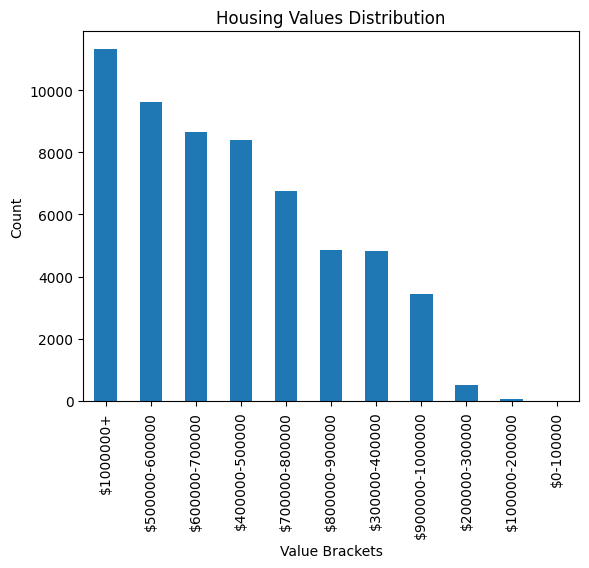

In [19]:
padlong['price_bracket'].value_counts().plot.bar()
plt.title("Housing Values Distribution")
plt.xlabel("Value Brackets")
plt.ylabel("Count")
plt.show()

In [20]:
reg_violation = pd.read_csv("./data/Violations2010_2021.csv", encoding='cp1252')
reg_violation.drop(
    reg_violation.columns.difference(
        ['ticket_no', 'status_dttm', 'status', 'code', 'description', 'value', 'stno', 'sthigh', 'street', 'suffix', 'zip', 'city', 
        'latitude', 'longitude', 'Land_Parcel_ID', 'Blk_ID_10', 'PropViol', 'CodeViol' ]
        ),
    1, inplace=True)

reg_violation['zip'] = reg_violation['zip'].fillna(0)
reg_violation['zip'] = reg_violation['zip'].astype(int)
reg_violation["Address"] = reg_violation['stno'] + ' ' + reg_violation['street'] + ' ' + reg_violation['suffix']
reg_violation.sort_values(by="value", ascending=False).head()

C:\Users\david\AppData\Local\Temp\ipykernel_21472\1517784846.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  reg_violation.drop(


,ticket_no,status_dttm,status,code,value,description,stno,sthigh,street,suffix,city,zip,PropViol,CodeViol,Land_Parcel_ID,Blk_ID_10,latitude,longitude,Address
147203,CE129771,2012-07-19 11:07:00,Closed,14b,10000.0,Illegal dumping vehicle:,18,NaN,Evelyn,ST,Mattapan,2126,0,1,1.404164e+09,2.502510e+14,42.27986,-71.09187,18 Evelyn ST
132948,CE114037,2011-12-16 09:45:00,Closed,14a,3000.0,Illegal dumping w a vehicle,744,748,Dudley,ST,Dorchester,2125,0,1,7.038510e+08,2.502509e+14,42.31797,-71.06662,744 Dudley ST
234508,CE163356,2013-08-23 02:45:00,Closed,14a,3000.0,Illegal dumping w a vehicle,15,NaN,King,ST,Dorchester,2122,0,1,1.601580e+09,2.502510e+14,42.29199,-71.06111,15 King ST
14144,CE86657,2010-11-15 12:51:00,Closed,13,3000.0,Illegal dumping: Haz Waste,456,458,Ashmont,ST,Dorchester,2122,0,1,1.602075e+09,2.502510e+14,42.28869,-71.05440,456 Ashmont ST
481399,CE383454,2018-02-12 10:40:00,Closed,14a,3000.0,Illegal dumping w a vehicle,950,NaN,American Legion,HWY,Roslindale,2131,0,1,1.807323e+09,2.502514e+14,42.27499,-71.11478,950 American Legion HWY


<AxesSubplot: xlabel='Price Bracket', ylabel='Violation Count'>

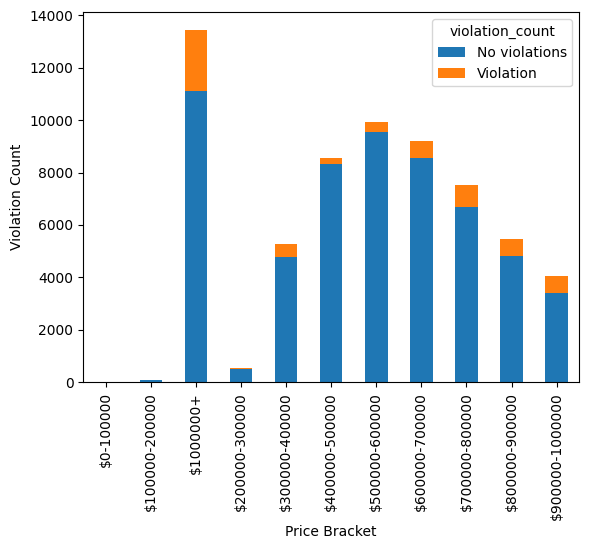

In [21]:
combined = padlong.merge(
    reg_violation[['ticket_no', 'status_dttm', 'status', 'code', 'description', 'value', 'city', 'longitude', 'latitude']], 
    left_on=["longitude", "latitude"], 
    right_on=["longitude", "latitude"], 
    how='left')



#combined['zip'] = combined['zip'].fillna(0)
combined['ZIPCODE'] = combined['ZIPCODE'].astype(int)
combined.drop('ST_NUM', axis=1, inplace=True)
combined['violation_count'] = combined['ticket_no'].apply(
    lambda x: "Violation" if pd.notna(x) else "No violations"
)

l3 = ["0 - 100000", "100000-200000", "200000-300000", "300000-400000", "400000-500000", "500000-600000", "600000-700000", "700000-800000", "800000-900000", "900000-1000000", "1000000+"]

flt_df = combined[['price_bracket', 'violation_count']]

flt_df.sort_values(by="violation_count")


flt_df.groupby(['price_bracket', 'violation_count']).size().unstack().plot(kind='bar', stacked=True, xlabel="Price Bracket", ylabel="Violation Count")




In [22]:
boston_map = folium.Map(location=[42.3742, -71.0371])
no_violations = combined[combined['ticket_no'].notna()]
#no_violations.head()
heat_df = no_violations[['latitude','longitude','FY2021.AV']]
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude', 'FY2021.AV'])
heat_data = heat_df.values.tolist()
HeatMap(heat_data).add_to(boston_map)
boston_map.save("HeatMapQuick.html")



,PID,CM_ID,ST_NUM,ST_NAME,ZIPCODE,FY2021.LU,FY2021.AV,DiffAV2021,longitude,latitude,Blk_ID_10,Address,price_bracket,date,violation_type,address
